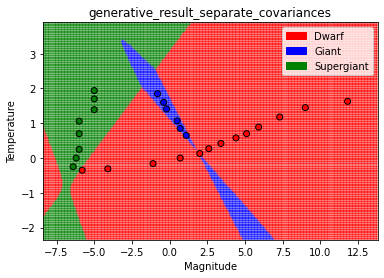

Separate Covariance negative log-likelihood: 63.97035984092419



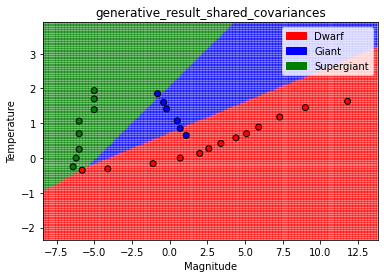

Shared Covariance negative log-likelihood: 116.39446507788162



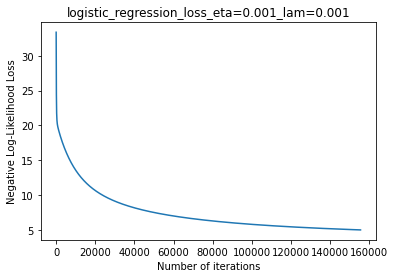

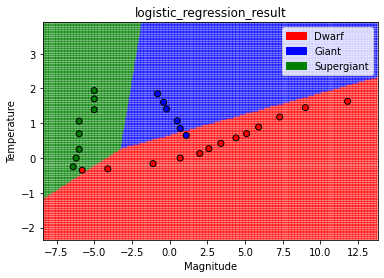

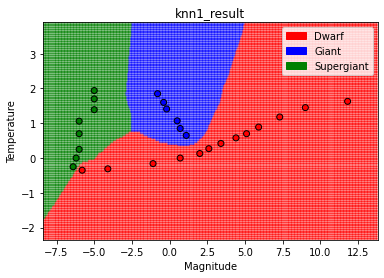

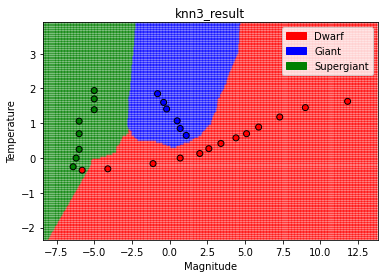

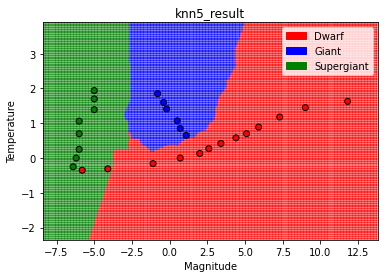

Test star type predictions for Separate Covariance Gaussian Model:
magnitude 6 and temperature 2: 0

Test star type predictions for Shared Covariance Gaussian Model:
magnitude 6 and temperature 2: 1

Test star type predictions for Linear Regression:
magnitude 6 and temperature 2: 1.0
Test star type predictions for KNN Model with k=1:
magnitude 6 and temperature 2: 0.0
Test star type predictions for KNN Model with k=3:
magnitude 6 and temperature 2: 0.0
Test star type predictions for KNN Model with k=5:
magnitude 6 and temperature 2: 0.0


In [1]:
# Don't change these imports. Note that the last two are the
# class implementations that you will implement in
# T2_P3_LogisticRegression.py and T2_P3_GaussianGenerativeModel.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.patches as mpatches
from T2_P3_LogisticRegression import LogisticRegression
from T2_P3_GaussianGenerativeModel import GaussianGenerativeModel
from T2_P3_KNNModel import KNNModel


# These are the hyperparameters to the classifiers. You may need to
# adjust these as you try to find the best fit for each classifier.

# Logistic Regression hyperparameters
eta = 0.001 # Learning rate
lam = 0.001 # Lambda for regularization

# Whether or not you want the plots to be displayed
show_charts = True


# DO NOT CHANGE ANYTHING BELOW THIS LINE!
# -----------------------------------------------------------------

# Visualize the decision boundary that a model produces
def visualize_boundary(model, X, y, title, width=2):
    # Create a grid of points
    x_min, x_max = min(X[:, 0] - width), max(X[:, 0] + width)
    y_min, y_max = min(X[:, 1] - width), max(X[:, 1] + width)
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.05),
        np.arange(y_min, y_max, 0.05)
    )

    # Flatten the grid so the values match spec for self.predict
    xx_flat = xx.flatten()
    yy_flat = yy.flatten()
    X_pred = np.vstack((xx_flat, yy_flat)).T

    # Get the class predictions
    Y_hat = model.predict(X_pred)
    #print("Yhatshape",Y_hat.shape,"X_predshape",X_pred.shape)
    #print("Model:",model)
    Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1]))

    # Visualize them.
    cmap = c.ListedColormap(['r', 'b', 'g'])
    plt.figure()
    plt.title(title)
    plt.xlabel('Magnitude')
    plt.ylabel('Temperature')
    plt.pcolormesh(xx, yy, Y_hat, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, linewidths=1,
                edgecolors='black')

    # Adding a legend and a title
    red = mpatches.Patch(color='red', label='Dwarf')
    blue = mpatches.Patch(color='blue', label='Giant')
    green = mpatches.Patch(color='green', label='Supergiant')
    plt.legend(handles=[red, blue, green])

    # Saving the image to a file, and showing it as well
    plt.savefig(title + '.png')
    if show_charts:
        plt.show()


# A mapping from string name to id
star_labels = {
    'Dwarf': 0,       # also corresponds to 'red' in the graphs
    'Giant': 1,       # also corresponds to 'blue' in the graphs
    'Supergiant': 2   # also corresponds to 'green' in the graphs
}

# Read from file and extract X and y
df = pd.read_csv('data/hr.csv')
X = df[['Magnitude', 'Temperature']].values
y = np.array([star_labels[x] for x in df['Type']])

# Setting up and evaluating a number of different classification models
nb1 = GaussianGenerativeModel(is_shared_covariance=False)
nb1.fit(X, y)
visualize_boundary(nb1, X, y, 'generative_result_separate_covariances')
print('Separate Covariance negative log-likelihood: {}\n'
      .format(nb1.negative_log_likelihood(X, y)))

nb2 = GaussianGenerativeModel(is_shared_covariance=True)
nb2.fit(X, y)
visualize_boundary(nb2, X, y, 'generative_result_shared_covariances')
print('Shared Covariance negative log-likelihood: {}\n'
      .format(nb2.negative_log_likelihood(X, y)))

lr = LogisticRegression(eta=eta, lam=lam)
lr.fit(X, y)
nloglikelihood=lr.visualize_loss('logistic_regression_loss', show_charts=show_charts)
visualize_boundary(lr, X, y, 'logistic_regression_result')

knn1 = KNNModel(k=1)
knn1.fit(X, y)
visualize_boundary(knn1, X, y, 'knn1_result')

knn3 = KNNModel(k=3)
knn3.fit(X, y)
visualize_boundary(knn3, X, y, 'knn3_result')

knn5 = KNNModel(k=5)
knn5.fit(X, y)
visualize_boundary(knn5, X, y, 'knn5_result')


# Setting up some sample data
X_test = np.array([[6, 2]])
y_nb1 = nb1.predict(X_test)
y_nb2 = nb2.predict(X_test)
y_lr = lr.predict(X_test)
y_knn1 = knn1.predict(X_test)
y_knn3 = knn3.predict(X_test)
y_knn5 = knn5.predict(X_test)

# Predicting an unseen example
print('Test star type predictions for Separate Covariance Gaussian Model:')
print('magnitude 6 and temperature 2: {}\n'.format(y_nb1[0]))

print('Test star type predictions for Shared Covariance Gaussian Model:')
print('magnitude 6 and temperature 2: {}\n'.format(y_nb2[0]))

print('Test star type predictions for Linear Regression:')
print('magnitude 6 and temperature 2: {}'.format(y_lr[0]))

print('Test star type predictions for KNN Model with k=1:')
print('magnitude 6 and temperature 2: {}'.format(y_knn1[0]))

print('Test star type predictions for KNN Model with k=3:')
print('magnitude 6 and temperature 2: {}'.format(y_knn3[0]))

print('Test star type predictions for KNN Model with k=5:')
print('magnitude 6 and temperature 2: {}'.format(y_knn5[0]))

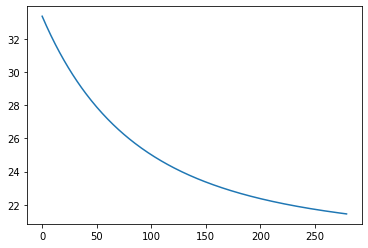

In [2]:
plt.plot(nloglikelihood[0:280])

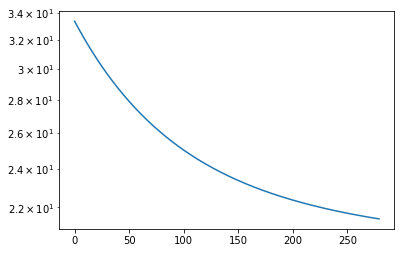

In [3]:
plt.semilogy(nloglikelihood[0:280])

In [4]:
y.shape

(27,)

In [5]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
xtext=np.ones(5,3)

TypeError: Cannot interpret '3' as a data type

In [ ]:
deltaXmu=np.array([1,2,3])

In [ ]:
deltaXmu

In [ ]:
deltaXmu.T

In [ ]:
np.dot(deltaXmu.T,deltaXmu)